In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
import torch.nn as nn
import torch.optim as optim
import torch

In [ ]:
from utils import MnistData
from models import ModelManager, ModelType

In [ ]:
model_loaded = ModelManager.get_trained(ModelType.MnistCnnPatt)
generator = ModelManager.get_untrained(ModelType.MnistGanGenerator)
discriminator = ModelManager.get_untrained(ModelType.MnistGanDiscriminator)

In [ ]:
data = MnistData()

In [ ]:
images = None

In [15]:
generator = ModelManager.get_untrained(ModelType.MnistGanGenerator)
discriminator = ModelManager.get_untrained(ModelType.MnistGanDiscriminator)

In [16]:
batch_size = 30
gen_batch_size = 30
loss_fn = nn.BCELoss()
discriminator_optimizer = optim.RMSprop(discriminator.parameters(), lr=1e-3)
batch, _ = data.get_training_batch(batch_size)
rand_batch = torch.rand((gen_batch_size, 1, 28, 28))
images = batch
for epoch in range(2001):
    batch, _ = data.get_training_batch(batch_size)
    rand_batch = torch.rand((gen_batch_size, 1, 28, 28))
    images = rand_batch
    discriminator_optimizer.zero_grad()
    discriminator_optimizer.zero_grad()
    loss_two = loss_fn(discriminator(images.detach()), torch.zeros(gen_batch_size, 1)) \
        + loss_fn(discriminator(batch), torch.ones(batch_size, 1))
    loss_two.backward()
    discriminator_optimizer.step()
    if epoch % 100 == 0:
        print(f'--- {epoch} ---')

--- 0 ---
--- 100 ---
--- 200 ---
--- 300 ---
--- 400 ---
--- 500 ---
--- 600 ---
--- 700 ---
--- 800 ---
--- 900 ---
--- 1000 ---
--- 1100 ---
--- 1200 ---
--- 1300 ---
--- 1400 ---
--- 1500 ---
--- 1600 ---
--- 1700 ---
--- 1800 ---
--- 1900 ---
--- 2000 ---


--- 0 ---


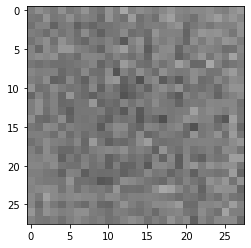

--- 1 ---


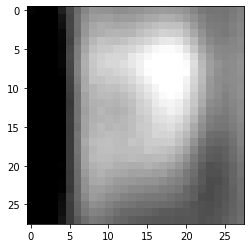

--- 2 ---


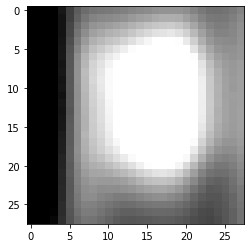

--- 3 ---


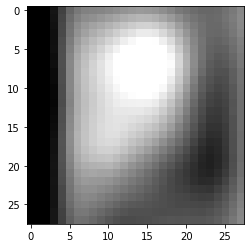

--- 4 ---


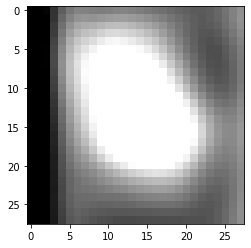

--- 5 ---


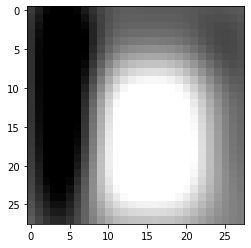

--- 6 ---


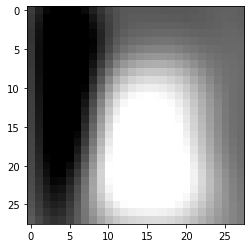

--- 7 ---


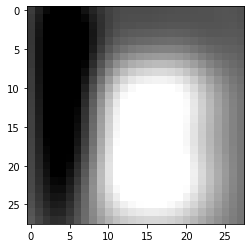

--- 8 ---


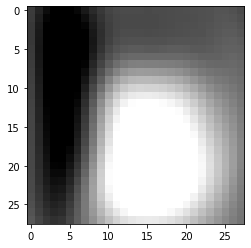

--- 9 ---


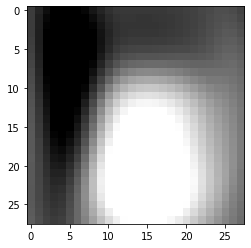

In [17]:
batch_size = 100
gen_batch_size = 100
loss_fn = nn.BCELoss()
discriminator_optimizer = optim.Adam(discriminator.parameters(), lr=1e-3)
generator_optimizer = optim.Adam(generator.parameters(), lr=1e-3)
batch, _ = data.get_training_batch(batch_size)
rand_batch = torch.rand((gen_batch_size, 1, 28, 28))
images = batch
for epoch in range(100):
    batch, _ = data.get_training_batch(batch_size)
    rand_batch = torch.rand((gen_batch_size, 1, 28, 28))
    images = generator(rand_batch)
    generator_optimizer.zero_grad()
    
    discriminator_optimizer.zero_grad()
    
    loss_one = loss_fn(discriminator(images), torch.ones(gen_batch_size, 1))
    loss_one.backward(retain_graph=True)
    generator_optimizer.step()

    discriminator_optimizer.zero_grad()
    loss_two = loss_fn(discriminator(images.detach()), torch.zeros(gen_batch_size, 1)) \
        + loss_fn(discriminator(batch), torch.ones(batch_size, 1))
    loss_two.backward()
    discriminator_optimizer.step()
    
    #batch, _ = data.get_training_batch(batch_size)
    
    if epoch % 10 == 0:
        print(f'--- {epoch} ---')
        MnistData.display(images[0], scale=True)

In [13]:
discriminator(images), discriminator(batch)

(tensor([[0.9968],
         [0.9996],
         [0.9990],
         [0.9981],
         [0.9972],
         [0.9998],
         [0.9323],
         [0.9954],
         [0.9982],
         [0.9998]], grad_fn=<SigmoidBackward>),
 tensor([[0.1933],
         [0.9755],
         [0.8617],
         [0.9914],
         [0.2805],
         [0.3859],
         [0.9978],
         [0.5252],
         [0.9315],
         [0.6391]], grad_fn=<SigmoidBackward>))

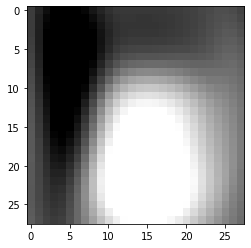

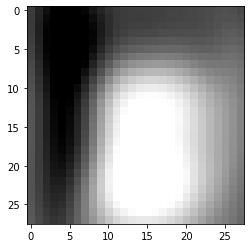

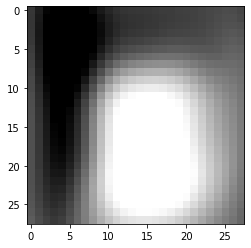

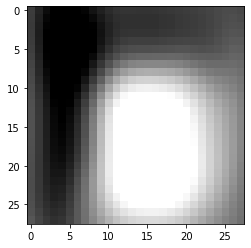

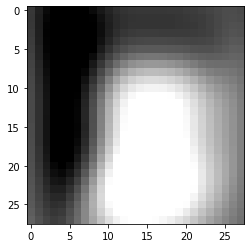

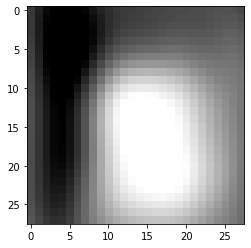

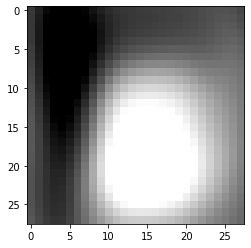

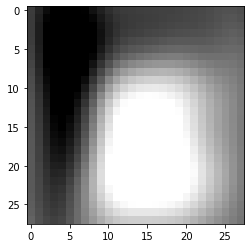

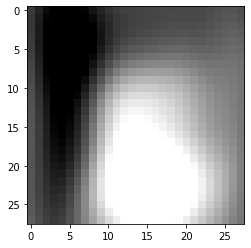

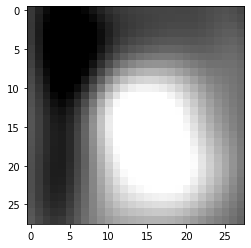

In [18]:
#images = generator(model_loaded(data.get_training_batch(batch_size)[0]) * 0.9)
for i in range(min(batch_size, 10)):
    MnistData.display(images[i])

In [ ]:
ModelManager.save_model(ModelType.MnistGanDiscriminator, discriminator)

In [ ]:
batch_size = 20
step_size = 1e-3
_, labels = data.get_training_batch(batch_size)
#images = torch.rand((batch_size, 1, 28, 28))
#n = images.detach()
n = torch.zeros((batch_size, 1, 28, 28))
loss_fn = nn.CrossEntropyLoss()
for i in range(100):
    n.requires_grad = True
    if n.grad is not None:
        n.grad.zero_()
    loss = loss_fn(model_loaded(n), labels)
    loss.backward()
    new_images = n - step_size * n.grad.apply_(lambda x: 1 if x >= 0 else -1)
    n = MnistData.clip_for_image(new_images)

In [ ]:
for i in range(min(batch_size, 20)):
    MnistData.display(n[i])